# After Training

In this exercise, you will create a deep learning model, save it, and load it to evaluate its performance on unseen data.

In [1]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data
data = Path("../Resources/music.csv")
df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [3]:
# Define the features set 'X', and the target 'y' set.
X = df.iloc[:, 0:67].values
y = df.iloc[:, 68:70].values

In [4]:
# Split the data into training and testing sets using the train_test_split method from sklearn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [5]:
# Scale the data for the features set X_tain and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Create a neural network with 1 hidden layer
number_hidden_nodes = 8
number_input_features = X_train_scaled.shape[1]

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

2022-06-13 20:30:50.439364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X_train_scaled, y_train, validation_split=0.3, epochs=300, verbose = 0)

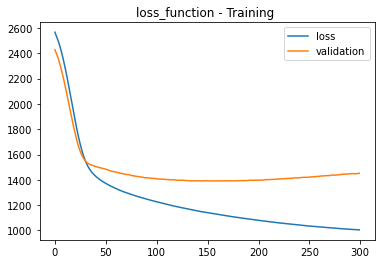

In [8]:
# Plot the training loss function
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training ")
plt.legend(["loss", "validation"])
plt.show()


In [9]:
# Save model as JSON
nn_json = nn.to_json()

file_path = Path("model.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = "model.h5"
nn.save_weights(file_path)

In [10]:
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = Path("model.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# load weights into new model
file_path = "model.h5"
loaded_model.load_weights(file_path)

In [14]:
# Predict values using the testing data
y_pred = loaded_model.predict(X_test_scaled)

9/9 [==============================] - 0s 3ms/step


In [15]:
# Evaluate the model with the MSE metric
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

ValueError: y_true and y_pred have different number of output (2!=1)